In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

In [4]:
df = pd.read_csv('data/bus_007_data.csv')
df

,ts,ActualEngPercentTorque,EngSpeed,FrontAxleLeftWheelSpeed,AcceleratorPedalPosition1,EnginePercentLoadAtCurrentSpeed,WheelBasedVehicleSpeed,EngInstantaneousFuelEconomy,HighResolutionEngTotalFuelUsed,HighResolutionTripDistance
0,2022-12-01 03:22:22,21.0,610.500,3.359375,19.2,33.0,3.238281,16.392578,88108.841,NaN
1,2022-12-01 03:22:23,21.0,612.625,3.929688,21.2,33.0,3.914062,25.376953,NaN,1.067825e+06
2,2022-12-01 03:22:24,21.0,605.875,4.414062,5.2,35.0,4.496094,25.685547,88108.844,1.067825e+06
3,2022-12-01 03:22:25,20.0,609.875,4.757812,0.0,33.0,4.972656,25.697266,88108.846,NaN
4,2022-12-01 03:22:26,11.0,658.500,4.156250,0.0,0.0,4.324219,26.904297,NaN,1.067830e+06
...,...,...,...,...,...,...,...,...,...,...
319304,2022-12-12 23:24:35,7.0,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN
319305,2022-12-12 23:24:36,130.0,8191.875,NaN,0.0,0.0,NaN,NaN,NaN,NaN
319306,2022-12-12 23:24:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.147484e+10
319307,2022-12-12 23:25:12,NaN,NaN,NaN,0.0,255.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319309 entries, 0 to 319308
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ts                               319309 non-null  object 
 1   ActualEngPercentTorque           304381 non-null  float64
 2   EngSpeed                         304381 non-null  float64
 3   FrontAxleLeftWheelSpeed          215826 non-null  float64
 4   AcceleratorPedalPosition1        265905 non-null  float64
 5   EnginePercentLoadAtCurrentSpeed  265905 non-null  float64
 6   WheelBasedVehicleSpeed           225423 non-null  float64
 7   EngInstantaneousFuelEconomy      103926 non-null  float64
 8   HighResolutionEngTotalFuelUsed   54936 non-null   float64
 9   HighResolutionTripDistance       128015 non-null  float64
dtypes: float64(9), object(1)
memory usage: 24.4+ MB


In [6]:
df.describe()

,ActualEngPercentTorque,EngSpeed,FrontAxleLeftWheelSpeed,AcceleratorPedalPosition1,EnginePercentLoadAtCurrentSpeed,WheelBasedVehicleSpeed,EngInstantaneousFuelEconomy,HighResolutionEngTotalFuelUsed,HighResolutionTripDistance
count,304381.000000,304381.000000,215826.000000,265905.000000,265905.000000,225423.000000,103926.000000,5.493600e+04,1.280150e+05
mean,21.462388,871.839839,24.600212,27.769179,31.849191,23.906199,19.244437,8.869178e+04,1.768100e+07
std,24.917189,305.772795,14.535116,34.688886,38.169230,16.671987,26.850599,3.108503e+04,5.999475e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.810884e+04,0.000000e+00
25%,4.000000,608.250000,13.398438,0.000000,0.000000,11.636719,4.177734,8.834162e+04,4.020700e+05
50%,9.000000,839.625000,24.976562,8.800000,6.000000,24.191406,8.021484,8.846698e+04,1.080785e+06
75%,34.000000,1055.500000,34.992188,50.000000,69.000000,34.812500,20.138184,8.858677e+04,1.368422e+06
max,130.000000,8191.875000,255.996094,102.000000,255.000000,255.996094,127.998047,4.294967e+06,2.147484e+10


In [55]:
missing_dict = dict()

# summarize the number of rows with missing values for each column
for column in df.columns:
    # count number of rows with missing values
    n_miss = df[column].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    missing_dict[column] = [n_miss, perc.round()]

missing_df = pd.DataFrame(missing_dict.values(),
                          index=missing_dict.keys(),
                          columns=['N_Missing [-]', 'Percentage [%]'])
missing_df

,N_Missing [-],Percentage [%]
ts,0,0.0
ActualEngPercentTorque,14928,5.0
EngSpeed,14928,5.0
FrontAxleLeftWheelSpeed,103483,32.0
AcceleratorPedalPosition1,53404,17.0
EnginePercentLoadAtCurrentSpeed,53404,17.0
WheelBasedVehicleSpeed,93886,29.0
EngInstantaneousFuelEconomy,215383,67.0
HighResolutionEngTotalFuelUsed,264373,83.0
HighResolutionTripDistance,191294,60.0


# EDA

### Column correlation

<AxesSubplot: >

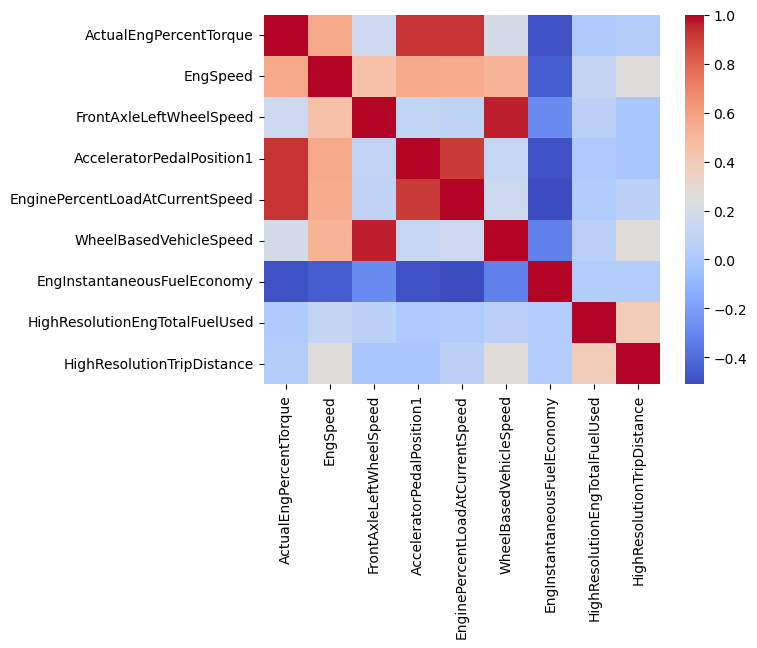

In [67]:
sns.heatmap(df.corr(), cmap='coolwarm')

### Pairwise relationships in a dataset

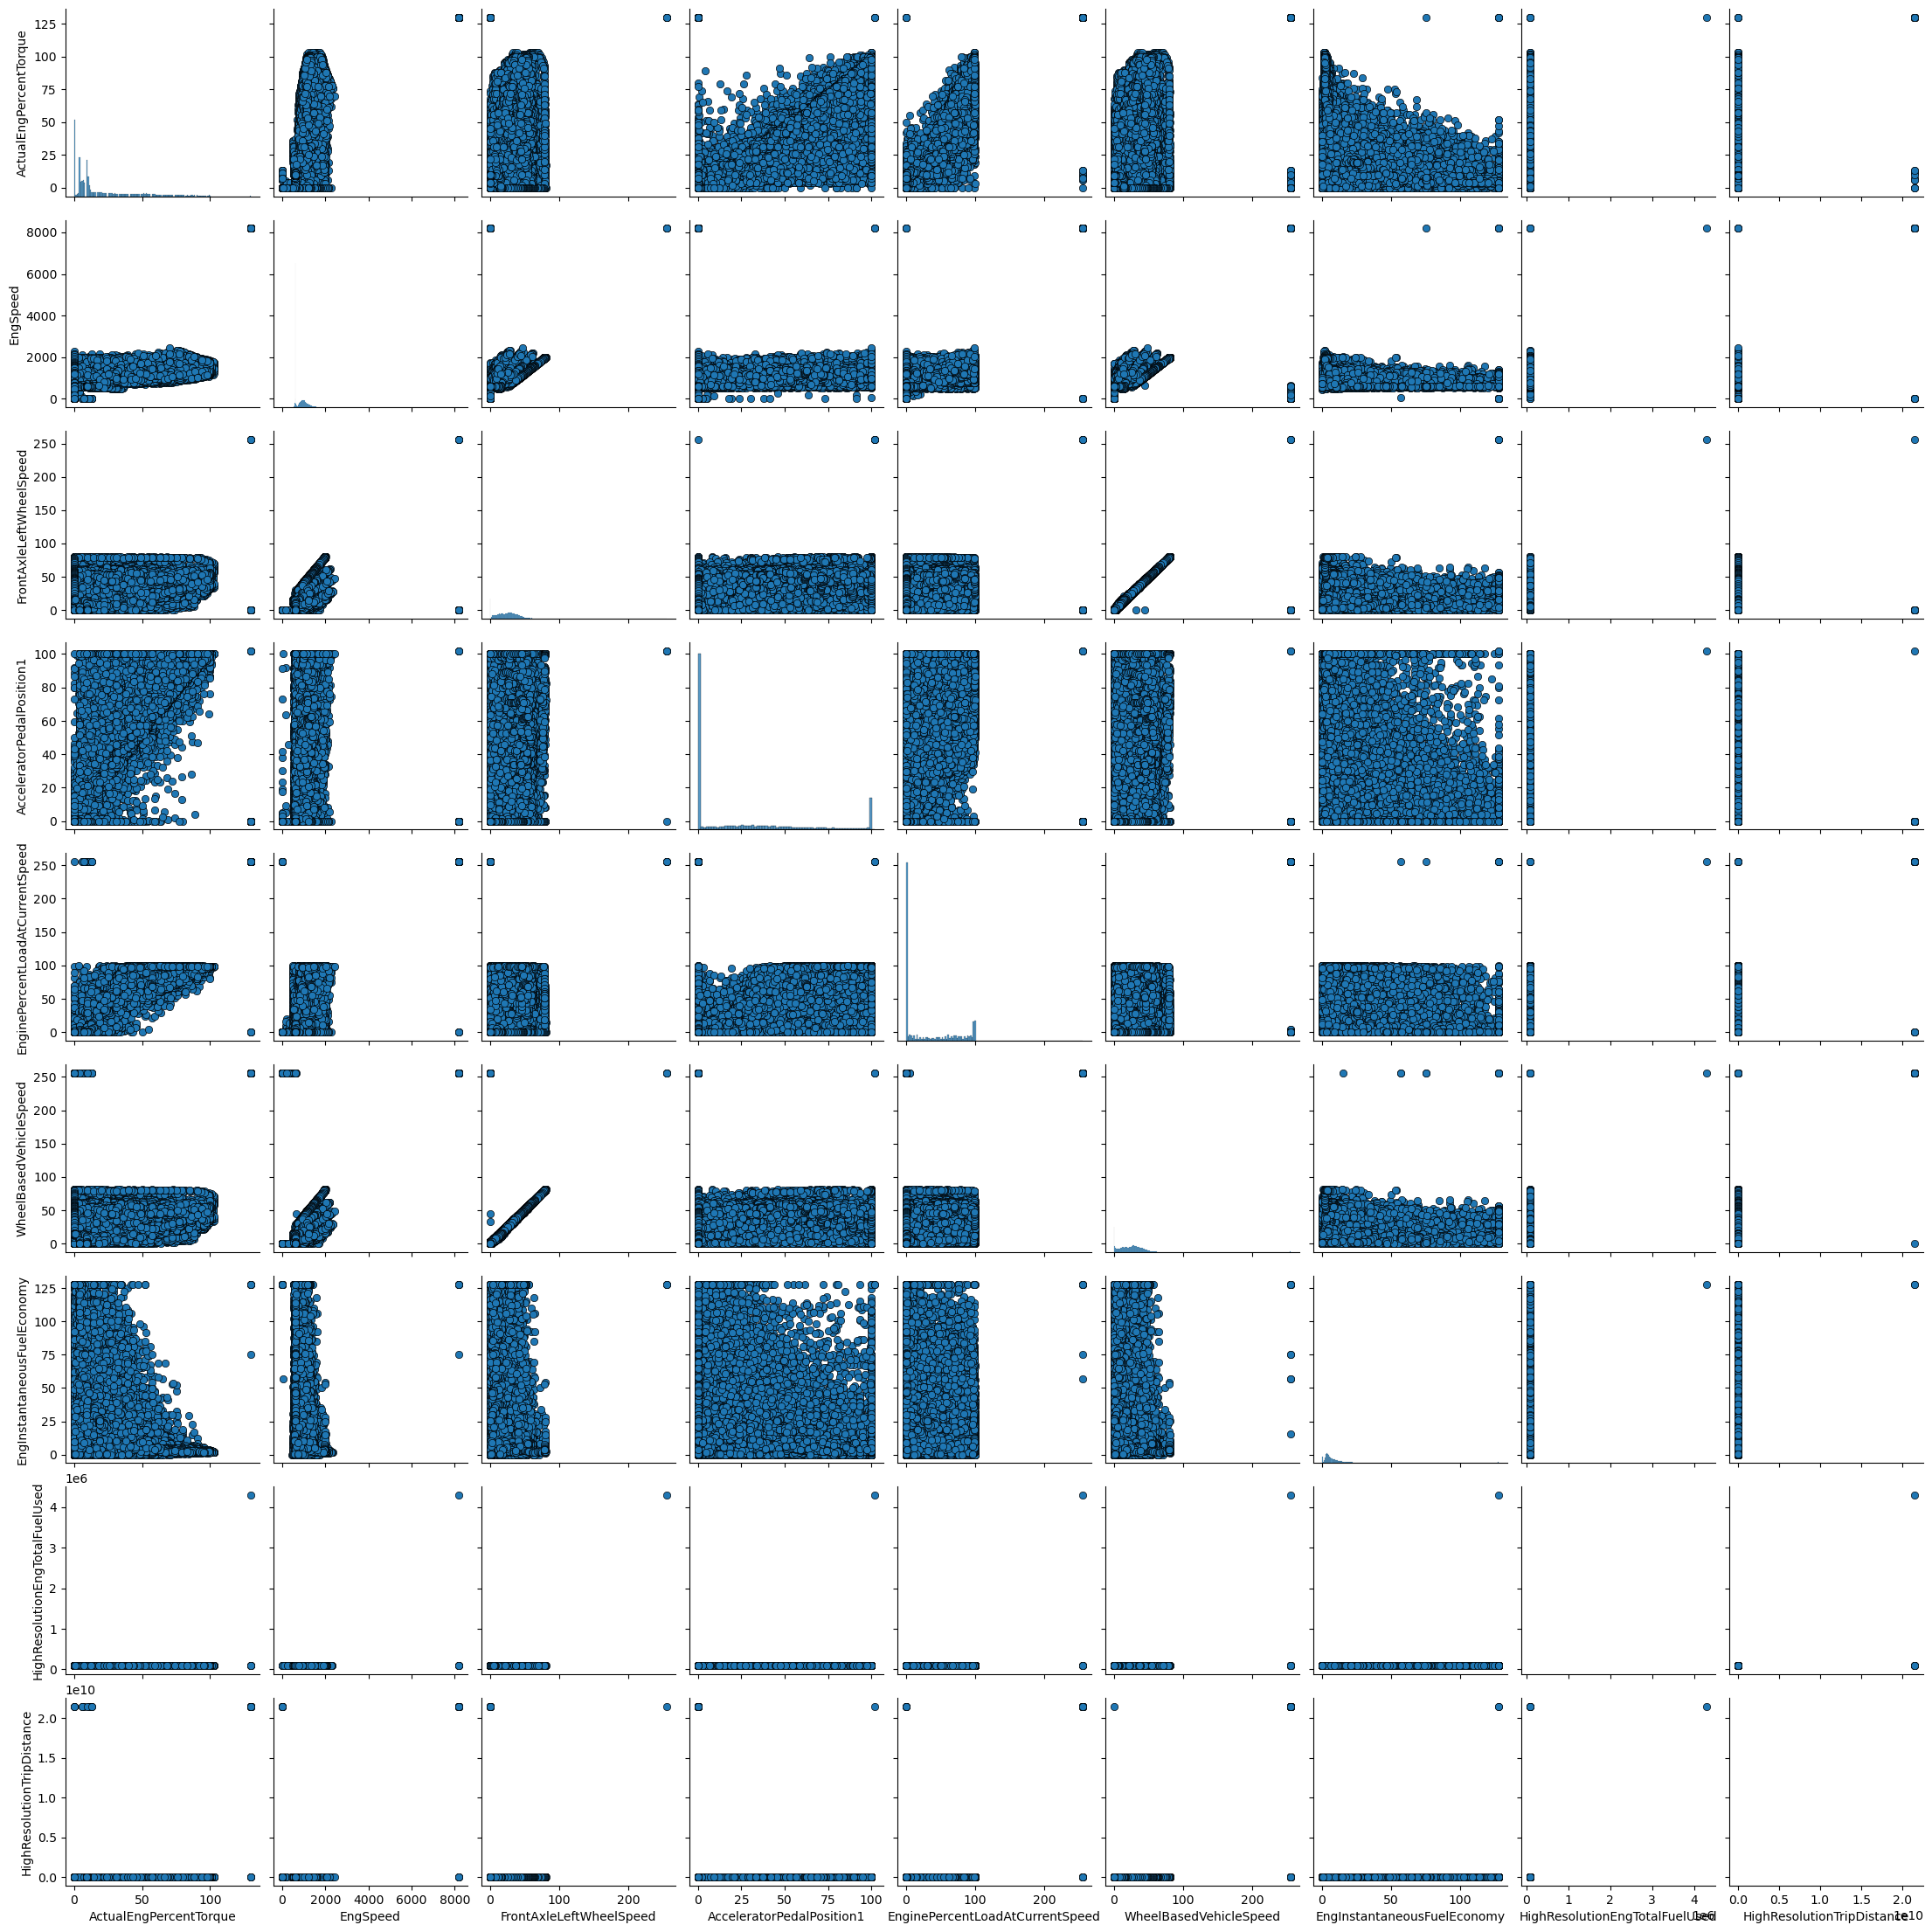

In [69]:
sns.pairplot(df, plot_kws=dict(edgecolor="black"))

### ActualEngPercentTorque [%]
The calculated output torque of the engine.

<AxesSubplot: xlabel='ActualEngPercentTorque', ylabel='Count'>

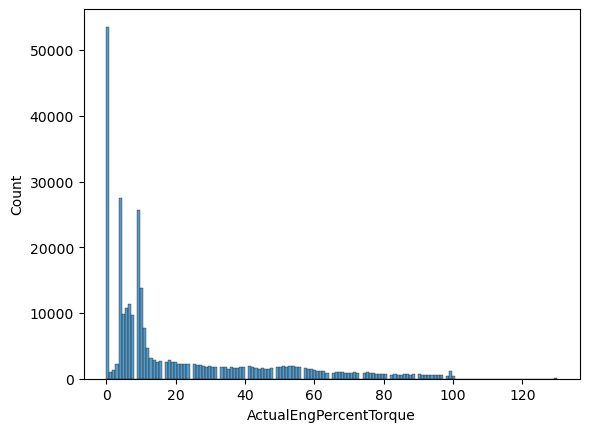

In [71]:
sns.histplot(df.ActualEngPercentTorque)

<AxesSubplot: xlabel='ActualEngPercentTorque', ylabel='Density'>

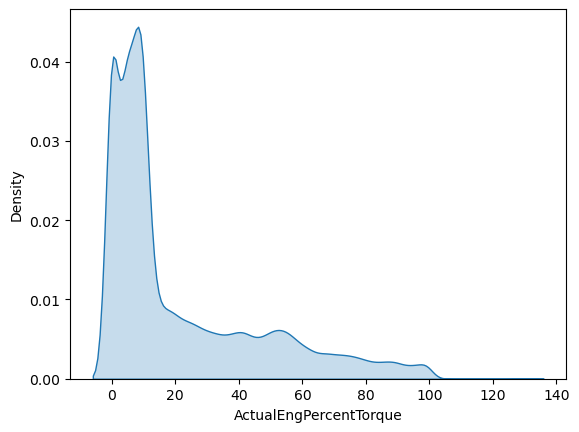

In [70]:
sns.kdeplot(df.ActualEngPercentTorque, fill=True)

<AxesSubplot: >

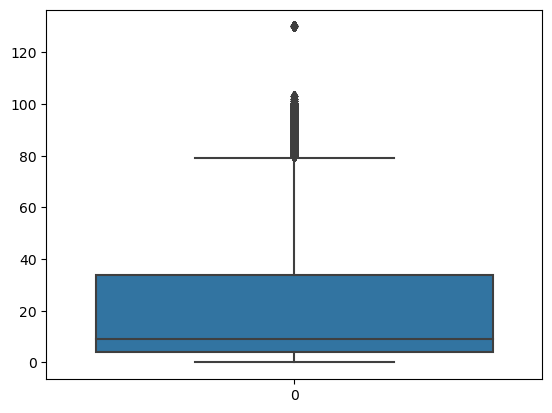

In [72]:
sns.boxplot(df.ActualEngPercentTorque)

#### Identify rows with outliers (The calculated output percentage torque of the engine > 100%)

In [87]:
df[df.ActualEngPercentTorque > 100].count()

ts                                 118
ActualEngPercentTorque             118
EngSpeed                           118
FrontAxleLeftWheelSpeed             90
AcceleratorPedalPosition1           95
EnginePercentLoadAtCurrentSpeed     95
WheelBasedVehicleSpeed              92
EngInstantaneousFuelEconomy         32
HighResolutionEngTotalFuelUsed      19
HighResolutionTripDistance          65
dtype: int64

In [97]:
df.drop(df[df.ActualEngPercentTorque > 100].index, inplace=False)

,ts,ActualEngPercentTorque,EngSpeed,FrontAxleLeftWheelSpeed,AcceleratorPedalPosition1,EnginePercentLoadAtCurrentSpeed,WheelBasedVehicleSpeed,EngInstantaneousFuelEconomy,HighResolutionEngTotalFuelUsed,HighResolutionTripDistance
0,2022-12-01 03:22:22,21.0,610.500,3.359375,19.2,33.0,3.238281,16.392578,88108.841,NaN
1,2022-12-01 03:22:23,21.0,612.625,3.929688,21.2,33.0,3.914062,25.376953,NaN,1.067825e+06
2,2022-12-01 03:22:24,21.0,605.875,4.414062,5.2,35.0,4.496094,25.685547,88108.844,1.067825e+06
3,2022-12-01 03:22:25,20.0,609.875,4.757812,0.0,33.0,4.972656,25.697266,88108.846,NaN
4,2022-12-01 03:22:26,11.0,658.500,4.156250,0.0,0.0,4.324219,26.904297,NaN,1.067830e+06
...,...,...,...,...,...,...,...,...,...,...
319302,2022-12-12 23:24:32,0.0,191.000,NaN,0.0,0.0,255.996094,NaN,NaN,NaN
319303,2022-12-12 23:24:33,0.0,39.125,NaN,0.0,0.0,NaN,NaN,NaN,NaN
319304,2022-12-12 23:24:35,7.0,0.000,NaN,0.0,0.0,NaN,NaN,NaN,NaN
319306,2022-12-12 23:24:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.147484e+10


### EngSpeed [RPM]
Actual engine speed which is calculated over a minimum crankshaft angle of 720 degrees divided by the number of cylinders.

<AxesSubplot: xlabel='EngSpeed', ylabel='Count'>

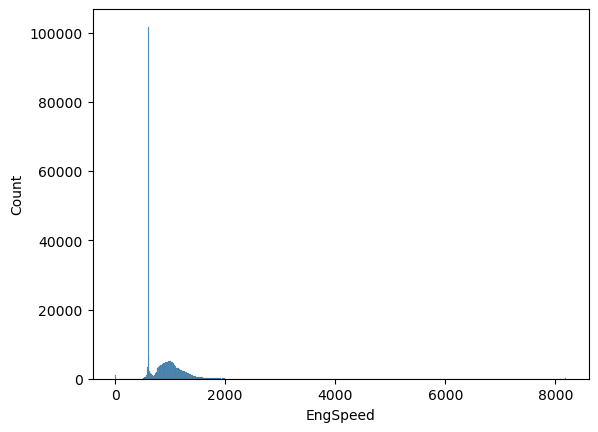

In [101]:
sns.histplot(df.EngSpeed)

<AxesSubplot: xlabel='EngSpeed', ylabel='Density'>

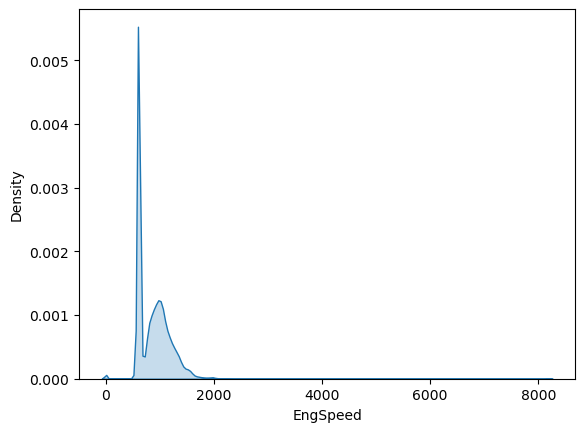

In [103]:
sns.kdeplot(df.EngSpeed, fill=True)

<AxesSubplot: >

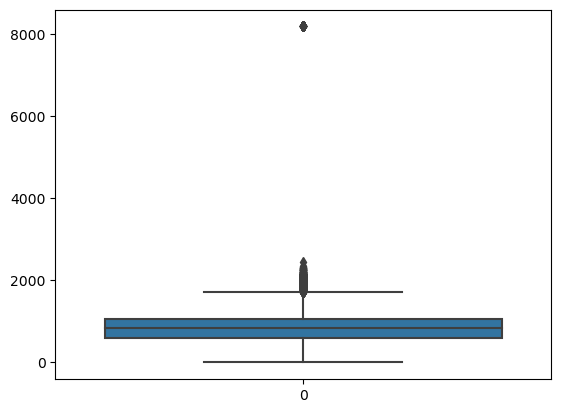

In [104]:
sns.boxplot(df.EngSpeed)